In [240]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# 10-d gaussians

class Perceptron_Custom:
    def __init__(self, d, iter_num, transformation = False):
        if transformation:
            self.w = np.random.rand((d+1+3))
        else:
            self.w = np.random.rand((d+1))
        self.iter = iter_num
        self.transformation = transformation
    
    
    def fit_sep(self, X, y):
        if self.transformation:
            X = self.feat_transform(X)
        
        X = self.augment_feats(X)
        error_vec = []
        w_vec = []
        w_best = self.w
        for iterations in range(0,self.iter):
            error = 0
            for i,examples in enumerate(X):
                
                product = np.dot(w_best, np.transpose(examples))
                
                if (y[i]==1 and product<0) :
                    error+=1
                    w_best = w_best + 0.01 *examples
                elif y[i]==0 and product>0:
                    error+=1
                    w_best = w_best - 0.01 * examples
            # print(error)
            error_vec.append(error/X.shape[0])
            w_vec.append(w_best)
        index = error_vec.index(min(error_vec))
        self.w = w_vec[index]
        return error_vec
                
    
    def augment_feats(self, X):
        aug_X = np.ones((X.shape[0], X.shape[1]+1))
        aug_X[:, :-1] = X
        return aug_X
    
    def predict_examples(self, test_X):
        if self.transformation:
            test_X = self.feat_transform(test_X)
        aug_test_X = self.augment_feats(test_X)
        product = np.dot(self.w, np.transpose(aug_test_X))
        print(product.shape)
        label = product>0
        return label + np.zeros((label.shape))
    
    def feat_transform(self, X):
        feat_trans = np.empty((X.shape[0],0))
        feat_trans = np.append(feat_trans, X[:, 0].reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, X[:, 1].reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, (X[:, 0]**2).reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, (X[:, 1]**2).reshape(-1, 1), axis = 1)
        feat_trans = np.append(feat_trans, np.multiply(X[:, 0], X[:, 1]).reshape(-1, 1), axis = 1)
        
        return feat_trans
                               
                
    

    
# size of data ==> n X d
# size of augmented data ==> n X (d+1)
# size of y ==> n X 1
# size of w ==> 1 X d+1

In [305]:
# number of dimensions
d = 2

percep = Perceptron_Custom(d, 1000, transformation = False)



# generate dataset
# mean_1 = np.zeros((d))
# mean_0 = np.zeros((d))

mean_1 = np.array([3, 6])
mean_0 = np.array([3, -2])

cov_1 = [[0.5, 0], [0, 2]]

cov_0 = [[2, 0], [0, 2]]


# cov_1 = np.identity(d)
# cov_1 = [[1, 0.9], [0.9, 1]]
# cov_0 = np.identity(d)

p_1 = 0.5
n = 2000
n_test = 1000
p_list = []
acc_sklearn = []
acc_list = []
for i in range(0,1):
    
    print(p_1)
    p_0 = 1-p_1
    # number of train examples
    t_1 = p_1*n
    t_0 = p_0*n
    
    # sampling from a gaussian
    X_train_1 = np.random.multivariate_normal(mean_1, cov_1, int(t_1))
    X_train_0 = np.random.multivariate_normal(mean_0, cov_0, int(t_0))
    
    # generating the test dataset
    X_test_1 = np.random.multivariate_normal(mean_1, cov_1, int(n_test*p_1))
    X_test_0 = np.random.multivariate_normal(mean_0, cov_0, int(n_test*p_0))
    
    X_train = np.append(X_train_1, X_train_0, axis = 0)
    X_test = np.append(X_test_1, X_test_0, axis = 0)
    
    # generate labels
    y_train = np.append(np.ones((int(t_1))), np.zeros((int(t_0))), axis =0)
    y_test = np.append(np.ones((int(n_test*p_1))), np.zeros((int(n_test*p_0))), axis = 0)
    
    
    # shuffle the dataset
    X_shuff, y_shuff = shuffle(X_train, y_train)
    
    error_vec = percep.fit_sep(X_shuff, y_shuff)
    
    # generate predictions
    test_pred = percep.predict_examples(X_test)
    
    # determine test accuracy
    acc = accuracy_score(test_pred, y_test)
    
    acc_list.append(acc)
    p_list.append(p_1)
    
    # sklearn implementatio
    clf = Perceptron(tol=1e-3, random_state=0)
    clf.fit(X_train, y_train)
    acc_sklearn.append(clf.score(X_test, y_test))
    
    p_1 +=0.1


0.5
(1000,)


In [312]:
test_pred = percep.predict_examples(X_train)
    
# determine test accuracy
acc = accuracy_score(test_pred, y_train)
print(acc)
confusion_matrix(test_pred, y_train)

(2000,)
0.9945


array([[990,   1],
       [ 10, 999]])

In [298]:
y_pred = clf.predict(X_train)

In [313]:
f1_score(test_pred, y_train)

0.9945246391239422

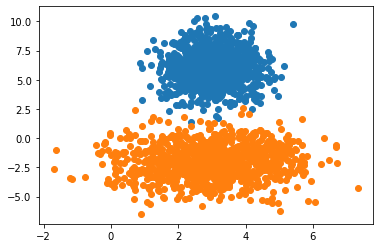

In [308]:
# data distribution

plt.scatter(X_train_1[:,0], X_train_1[:, 1])
plt.scatter(X_train_0[:,0], X_train_0[:,1])

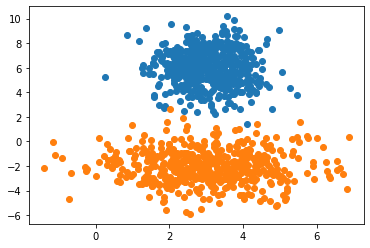

In [309]:
plt.scatter(X_test_1[:, 0], X_test_1[:, 1])
plt.scatter(X_test_0[:, 0], X_test_0[:, 1])

In [310]:
class_1 = []
class_0 = []
for i,items in enumerate(X_test):
    if test_pred[i]==0:
        class_0.append(items)
    else:
        class_1.append(items)

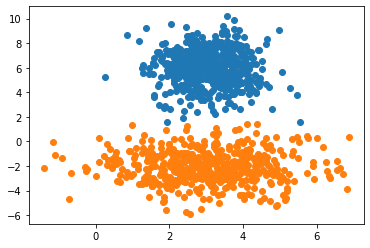

In [311]:
class_0 = np.array(class_0)
class_1 = np.array(class_1)
plt.scatter(class_1[:, 0], class_1[:, 1])
plt.scatter(class_0[:, 0], class_0[:, 1])

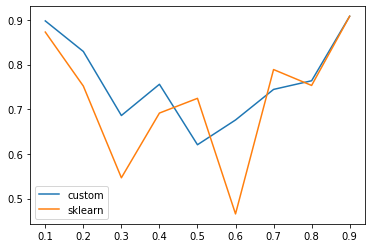

In [227]:
a = plt.plot(p_list, acc_list)
b = plt.plot(p_list, acc_sklearn)
plt.legend(["custom", 'sklearn'])
plt.show()

In [229]:
acc_list

[0.972,
 0.9485,
 0.93,
 0.927,
 0.9065,
 0.921,
 0.924,
 0.9379689844922461,
 0.9714857428714357]

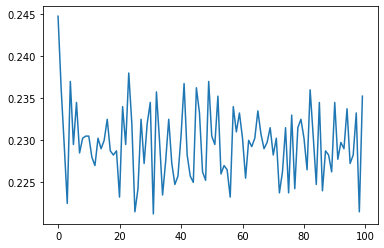

In [201]:

plt.plot(error_vec[:100])
plt.show()

In [217]:
# bayes classifier

# generate mle estimates of the bayes classifier
acc_list = []
p_list = []
p_1 = 0.1
for i in range(0,9):
    
    print(p_1)
    p_0 = 1-p_1
    # number of train examples
    t_1 = p_1*n
    t_0 = p_0*n
    
    # sampling from a gaussian
    X_train_1 = np.random.multivariate_normal(mean_1, cov_1, int(t_1))
    X_train_0 = np.random.multivariate_normal(mean_0, cov_0, int(t_0))
    
    # generating the test dataset
    X_test_1 = np.random.multivariate_normal(mean_1, cov_1, int(n_test*p_1))
    X_test_0 = np.random.multivariate_normal(mean_0, cov_0, int(n_test*p_0))

    X_train = np.append(X_train_1, X_train_0, axis = 0)
    X_test = np.append(X_test_1, X_test_0, axis = 0)
    
    # generate labels
    y_train = np.append(np.ones((int(t_1))), np.zeros((int(t_0))), axis =0)
    y_test = np.append(np.ones((int(n_test*p_1))), np.zeros((int(n_test*p_0))), axis = 0)
    

    mu_mle_0 = np.mean(X_train_0, axis = 0)
    mu_mle_1 = np.mean(X_train_1, axis = 0)
    mu_mle_0 = mu_mle_0.reshape(-1,1)
    mu_mle_1 = mu_mle_1.reshape(-1,1)
    sigma_mle_0 = np.zeros((d, d))
    sigma_mle_1 = np.zeros((d, d))
    for items in X_train_0:

        items = items.reshape(-1, 1)

        sigma_mle_0 += np.matmul(items - mu_mle_0, np.transpose(items - mu_mle_0))

    for items in X_train_1:  

        items = items.reshape(-1, 1)

        sigma_mle_1 += np.matmul(items - mu_mle_1, np.transpose(items - mu_mle_1))

    sigma_mle_0 /=X_train_0.shape[0]
    sigma_mle_1 /= X_train_1.shape[0]

    alpha = 0.01
    sigma_mle_0 = sigma_mle_0 + alpha*np.identity(sigma_mle_0.shape[0])
    sigma_mle_1 = sigma_mle_1 + alpha*np.identity(sigma_mle_1.shape[0])

    # invert covariance matrices
    sigma_mle_inv_0 = np.linalg.inv(sigma_mle_0)
    sigma_mle_inv_1 = np.linalg.inv(sigma_mle_1)


    # generate ccd 
    f_1_list = []
    f_0_list = []
    c_1 = (2*np.pi) * np.sqrt(np.linalg.det(sigma_mle_1))
    c_0 = (2*np.pi) * np.sqrt(np.linalg.det(sigma_mle_0))
    for items in X_test:
        items = items.reshape(1, -1)
        u = np.matmul((items - mu_mle_1.reshape(1,-1)), sigma_mle_inv_1)
        out =  np.matmul(u, np.transpose((items - mu_mle_1.reshape(1,-1))))

        f_1_list.append((1/c_1)* np.exp(-0.5*out[0][0]))

    for items in X_test:
        items = items.reshape(1, -1)
        u = np.matmul((items - mu_mle_0.reshape(1,-1)), sigma_mle_inv_0)
        out =  np.matmul(u, np.transpose((items - mu_mle_0.reshape(1,-1))))

        f_0_list.append((1/c_0)* np.exp(-0.5*out[0][0]))


    test_pred_bayes = []
    for i, items in enumerate(f_1_list):
    #     print(items)
    #     print((f_0_list[i]))
    #     print('\n')

        if p_1*items>=p_0*f_0_list[i]:
            test_pred_bayes.append(1)
        else:
            test_pred_bayes.append(0)

    acc = accuracy_score(test_pred_bayes, y_test)
    acc_list.append(acc)
    p_list.append(p_1)
    p_1+=0.1

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


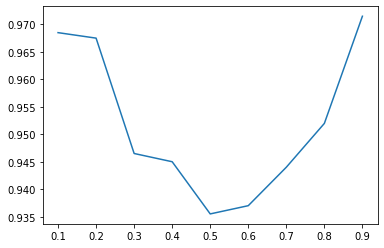

In [218]:
plt.plot(p_list, acc_list)

0.7915

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [205]:
# bayesian boundary
f_new_list = []
for i,items in enumerate(f_0_list):
    f_new_list.append(f_1_list[i]/items)

bound_0 = list()
bound_1 = list()
for i,items in enumerate(X_test):
    if f_new_list[i]<1:
        bound_0.append(items)
    else:
        bound_1.append(items)

bound_0 = np.array(bound_0)
bound_1 = np.array(bound_1)

In [207]:
bound_0.shape

(1020, 2)

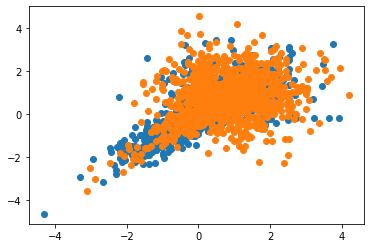

In [208]:
# Bayesian decision boundary

plt.scatter(bound_0[:, 0], bound_0[:, 1])
plt.scatter(bound_1[:, 0], bound_1[:, 1])